In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as ex 
import plotly.graph_objects as go


In [ ]:
# O arquivo csv está hospedao no meu git e chamo a partir da url para bão ter que fazer upload sempre do mesmo para o colab
walmart = pd.read_csv('https://raw.githubusercontent.com/valdirdpg/curso-dnc/master/MODULO-4/mini-projeto2/Walmart.csv')



```
INFORMAÇÕES DOS DADOS

Super Bowl     12-Feb-10, 11-Feb-11, 10-Feb-12
Labour Day     10-Sep-10, 09-Sep-11, 07-Sep-12
Thanksgiving   26-Nov-10, 25-Nov-11, 23-Nov-12
Christmas      31-Dec-10, 30-Dec-11, 28-Dec-12

**Variável**        **Descrição**
Store              Número da Loja
Date               Semana de Venda
Weekly_Sales       Venda Naquela Semana
Holiday_Flag       Flag se é ou não semana com feriado (1 -
                   Holiday Week 0 - Non-Holiday Week)
Temperature        Temperatura do dia em °F
Fuel_Price         Preço do combustível na região da loja
CPI                Índice de preços ao consumidor
Unemployment       Taxa de desemprego
```




In [ ]:
# formatar Weekly_Sales com duas casas decimais
walmart['Weekly_Sales'] = walmart['Weekly_Sales'].apply(lambda x: round(x, 2))

In [ ]:
# formatar Date para datetime
walmart['Date'] = pd.to_datetime(walmart['Date'])


In [ ]:
# verificar se tem valores não preenchidos e as sua médias
# percebo que todos estão preenchidos devido todos os atributos do dataframe terem 
# a mesma quantidade de informação 6435 linhas preenchidas, assim não carece de outros testes
walmart.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
# verificar se tem valores duplicados
# percebo que não tem valores duplicados
walmart.duplicated().sum()


0

In [ ]:
# Mais uma vez, verifico se tem valores nulos
# Sem valores nulos

walmart.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

<Axes: >

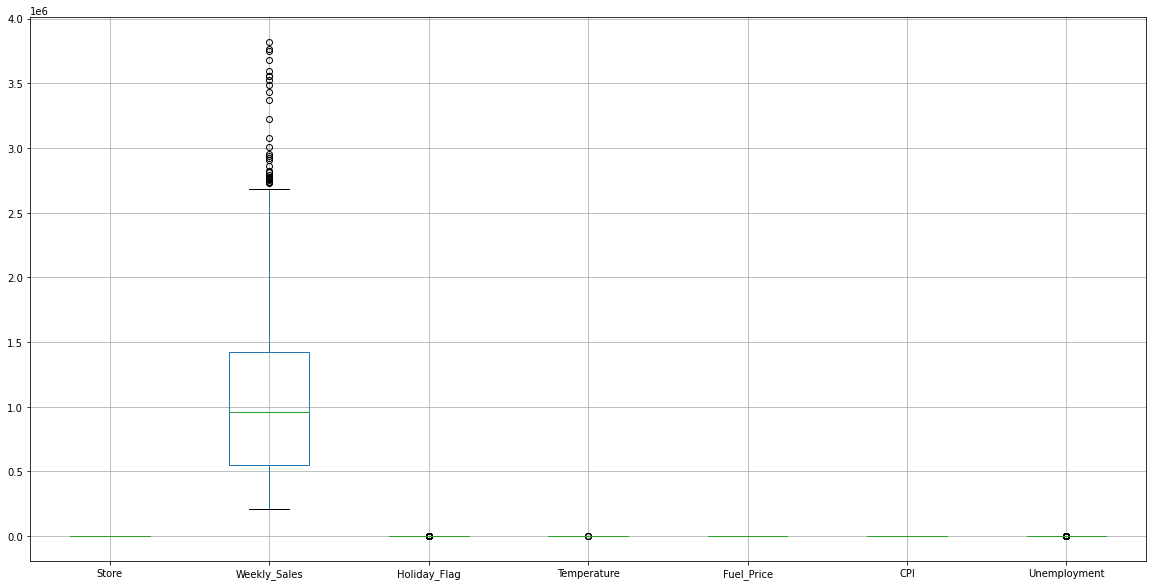

In [ ]:
# verificando se há outliers.
# Sem outliers
plt.figure(figsize=(20, 10))
walmart.boxplot()

In [ ]:
# Qual atributo tem a maior correlação (positiva ou negativa) com o número de vendas? (E que faz sentido) vendas?
# correlação entre as variáveis
walmart.corr()



,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


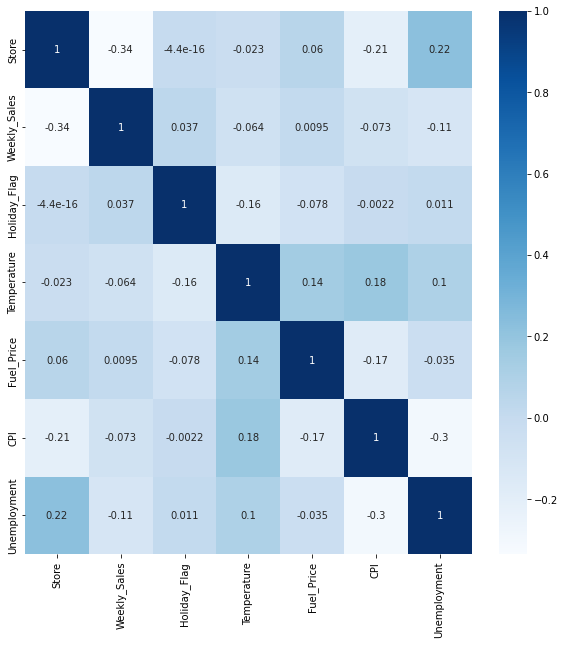

In [ ]:
# plotar um grafico de correlação entre as variáveis para iniciar a análise de qual loja  é mais valioso investir e porquê


plt.figure(figsize=(10,10))
sns.heatmap(walmart.corr(), annot=True, cmap='Blues')
plt.show()

# As realações positivas e negativas são fracas, mas já dá um norte de onde achar as respostas. A análise completa se encontra no relatório final da análise

In [ ]:
# qual é a média de vendas semanais para cada de loja?
preco_medio = walmart.groupby('Store').agg({'Weekly_Sales':np.mean}).reset_index()
# ordenando as médias de venda do maior para o menor
preco_medio.sort_values(by='Weekly_Sales', ascending=False)
# A Store 20 possui a maior média, mas ainda não é um indicativo da qual investir


,Store,Weekly_Sales
19,20,2.107677e+06
3,4,2.094713e+06
13,14,2.020978e+06
12,13,2.003620e+06
1,2,1.925751e+06
9,10,1.899425e+06
26,27,1.775216e+06
5,6,1.564728e+06
0,1,1.555264e+06
38,39,1.450668e+06


In [ ]:
# tirar o percentual de vendas de cada loja
# qual é a porcentagem da media de vendas para cada tipo de loja? Este é um insight importante, pois já começo a ver o índice de crescimento da Store
preco_medio['percentual'] = preco_medio['Weekly_Sales'] / preco_medio['Weekly_Sales'].sum() * 100
preco_medio.sort_values(by='percentual', ascending=False)

,Store,Weekly_Sales,percentual
19,20,2.107677e+06,4.473623
3,4,2.094713e+06,4.446107
13,14,2.020978e+06,4.289602
12,13,2.003620e+06,4.252759
1,2,1.925751e+06,4.087479
9,10,1.899425e+06,4.031600
26,27,1.775216e+06,3.767963
5,6,1.564728e+06,3.321194
0,1,1.555264e+06,3.301107
38,39,1.450668e+06,3.079098


In [ ]:
# variação percentual nas vendas em relação ao ano anterior para cada loja
# qual é a variação percentual nas vendas em relação ao ano anterior para cada loja? Este é um outro insightimportante pois 
# aponta para um crescimento ou decréscimo em comparação a naos anteriores
preco_medio['variação'] = preco_medio['Weekly_Sales'].pct_change() 
preco_medio.sort_values(by='variação', ascending=False)


,Store,Weekly_Sales,percentual,variação
3,4,2.094713e+06,4.446107,4.201614
5,6,1.564728e+06,3.321194,3.920346
38,39,1.450668e+06,3.079098,2.760822
33,34,9.667816e+05,2.052030,2.720370
9,10,1.899425e+06,4.031600,2.491714
30,31,1.395901e+06,2.962853,2.182778
44,45,7.859814e+05,1.668275,1.596150
12,13,2.003620e+06,4.252759,0.985745
26,27,1.775216e+06,3.767963,0.770062
16,17,8.935814e+05,1.896660,0.720915


In [ ]:
# grafico de linha para mostrar a variação percentual nas vendas em relação ao ano anterior para cada loja
# qual é a variação percentual nas vendas em relação ao ano anterior para cada loja?
fig = go.Figure()
fig.add_trace(go.Scatter(x=preco_medio['Store'], y=preco_medio['variação'], mode='lines+markers', name='variação'))
fig.update_layout(title='Variação percentual nas vendas em relação ao ano anterior para cada loja', xaxis_title='Store', yaxis_title='variação')
fig.show()

# Graficamente é perceptível o crescimento da loja 4 e 6 e estagnação da loja 20

In [ ]:
# Da loja com as vendas acumuladas mais altas (soma das vendas para todo o período), quantas semanas do ano ela excedeu a média para o período?
# agrupando por loja e somando as vendas
soma_venda_periodo = walmart.groupby('Store').agg({'Weekly_Sales':np.sum}).reset_index()
soma = soma_venda_periodo.sort_values(by='Weekly_Sales', ascending=False)
# pegando a loja com as 10 maior venda
top10_venda_acumulada = soma.head(10)

In [ ]:
# plotar grafico de histograma com as vendas acumulçadas por loja
# plt.figure(figsize=(20, 20))
fig = ex.histogram(top10_venda_acumulada , x='Weekly_Sales', color='Store', title='Vendas acumuladas por loja')
fig.show()



In [ ]:
# plotar o gráficode linha com as medias de vendas por semana de todas as lojas considerando o Holiday_Flag
# criar uma coluna com o valor 1 para as semanas com feriado e 0 para as semanas sem feriado
vendas_por_data = walmart.groupby(['Date', 'Holiday_Flag']).agg({'Weekly_Sales': [np.mean]}).reset_index()
# renomeando as colunas
vendas_por_data.columns = ['Date', 'Holiday_Flag', 'Weekly_Sales_mean']
# ordenando as médias de venda do maior para o menor
vendas_por_data = vendas_por_data.sort_values(by='Date')
# plotar o gráfico
fig = ex.line(vendas_por_data, x='Date', y='Weekly_Sales_mean', color='Holiday_Flag', title='Média de vendas por semana de todas as lojas considerando o Holiday_Flag')
fig.show()

In [ ]:
# Plotando grafico de linha por loja para analise de desempenho nas medias de vendas no acumulado das semanas
def grafico_linha_media_venda(df, store):

  loja = df[df['Store'] == store]
  # calculando a média de vendas semanais
  media_venda_semanal = loja['Weekly_Sales'].mean()
  # calculando a quantidade de semanas que a loja teve vendas acima da média
  loja[loja['Weekly_Sales'] > media_venda_semanal].count() 
  # exibir Weekly_Sales com vendas acima da média
  loja[loja['Weekly_Sales'] > media_venda_semanal]
  # exibir Weekly_Sales com vendas abaixo da média
  loja[loja['Weekly_Sales'] < media_venda_semanal]
  # exibir Weeks com vendas iguais a média
  loja[loja['Weekly_Sales'] == media_venda_semanal]
  # arreranjar os dados para plotar o gráfico
  loja = loja.sort_values(by='Date')
  # plotar o gráfico
  fig = ex.line(loja, x='Date', y='Weekly_Sales', title='Vendas por semana da loja 20 no período de 2010 a 2012')
  return fig.show()


In [ ]:
grafico_linha_media_venda(walmart, 33)

In [ ]:
# quantidade de vendas por loja a cima da propria media
# quantidade de vendas por loja a baixo da propria media
# quantidade de vendas por loja igual a propria media
# agrupar por loja e calcular a média de vendas
# Estes insights ajudaram a confirmar o potencial de cada loja. Existem Store que estão com vendas bem a cima da sua própria média, porem 
# com media de vendas inespressivas comparadas às Store com maiores medias de vendas, observando as 10 lojas com maiores médias, a loja 4 continua em destaque
# se comparar todos os indicadores
vendas_por_loja = walmart.groupby(['Store']).agg({'Weekly_Sales': [np.mean]}).reset_index()
# renomeando as colunas
vendas_por_loja.columns = ['Store', 'Weekly_Sales_mean']
# juntar as duas tabelas
vendas_por_loja = pd.merge(vendas_por_loja, walmart, on='Store')
# criar uma coluna com o valor 1 para as vendas acima da média e 0 para as vendas abaixo da média
vendas_por_loja['Acima_Media'] = np.where(vendas_por_loja['Weekly_Sales'] > vendas_por_loja['Weekly_Sales_mean'], 1, 0)
# criar uma coluna com o valor 1 para as vendas abaixo da média e 0 para as vendas acima da média
vendas_por_loja['Abaixo_Media'] = np.where(vendas_por_loja['Weekly_Sales'] < vendas_por_loja['Weekly_Sales_mean'], 1, 0)
# criar uma coluna com o valor 1 para as vendas iguais a média e 0 para as vendas diferentes da média
vendas_por_loja['Igual_Media'] = np.where(vendas_por_loja['Weekly_Sales'] == vendas_por_loja['Weekly_Sales_mean'], 1, 0)
# agrupar por loja e calcular a quantidade de vendas acima, abaixo e igual a média
vendas_por_loja = vendas_por_loja.groupby(['Store']).agg({'Acima_Media': [np.sum], 'Abaixo_Media': [np.sum], 'Igual_Media': [np.sum]}).reset_index()
# renomeando as colunas
vendas_por_loja.columns = ['Store', 'Acima_Media', 'Abaixo_Media', 'Igual_Media']
# plotar o gráfico
fig = ex.bar(vendas_por_loja, x='Store', y=['Acima_Media', 'Abaixo_Media', 'Igual_Media'], title='Quantidade de vendas por loja acima, abaixo e igual a média')
fig.update_layout(xaxis_title='Loja', yaxis_title='Quantidade de vendas')
fig.show()
fig = ex.line(vendas_por_loja, x='Store', y=['Acima_Media', 'Abaixo_Media', 'Igual_Media'], title='Quantidade de vendas por loja acima, abaixo e igual a média')
fig.show()

In [ ]:
# Plotando um gráfico com as vendas máximas, mínimas e médias de todas as lojas ao longo do tempo. Ressalte de alguma forma, o período de feriados mencionados
# As maiores vendas detectadas e suas mèdias são percebidas em 23/12/2010 e 24/12/2011 período de natal, mas não consta na listas de feriados fornecidas nos dados
vendas_por_data = walmart.groupby(['Date']).agg({'Weekly_Sales': [np.mean, np.max, np.min]}).reset_index()
vendas_por_data.columns = ['Date', 'Weekly_Sales_mean', 'Weekly_Sales_max', 'Weekly_Sales_min']
vendas_por_data = vendas_por_data.sort_values(by='Date')
# plotar o gráfico
fig = ex.line(vendas_por_data, x='Date', y=['Weekly_Sales_mean', 'Weekly_Sales_max', 'Weekly_Sales_min'], title='Vendas máximas, mínimas e médias de todas as lojas ao longo do tempo')
fig.update_layout(xaxis_title='Data', yaxis_title='Valor em $')
fig.show()

In [ ]:
# plotar um gráfico de barras com a média de vendas por loja durante todo o perído de 2010 a 2012
fig = ex.bar(vendas_por_loja, x='Store', y='Weekly_Sales_mean', title='Média de vendas por loja')
fig.update_layout(xaxis_title='Loja', yaxis_title='Valor em $') 
fig.show()

In [ ]:
# Função que gera um gráfico de barras com a média de vendas por por ano
# Ajuda a verificar se em algum deses anos hou alteração profunda nas médias e se positiva ou negativamente
# É possível perceber que não houve alterações bruscas

def media_venda_loja_ano(df, ano):
  df['Year'] = pd.DatetimeIndex(df['Date']).year
  vendas_por_loja_2010 = df[df['Year'] == ano].groupby(['Store']).agg({'Weekly_Sales': [np.mean]}).reset_index()
  # renomeando as colunas
  vendas_por_loja_2010.columns = ['Store', 'Weekly_Sales_mean']
  fig = ex.bar(vendas_por_loja_2010, x='Store', y='Weekly_Sales_mean', title=f'Média de vendas por loja em {ano}')
  fig.update_layout(xaxis_title='Loja', yaxis_title='Valor em $')
  return fig.show()


   


In [ ]:
media_venda_loja_ano(walmart, 2010)

In [ ]:
media_venda_loja_ano(walmart, 2011)

In [ ]:
media_venda_loja_ano(walmart, 2012)